# **1. Install pycaret**

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 53.2 MB/s eta 0:0

# **2. Check the pycaret version**

In [2]:
import pycaret
print(pycaret.__version__)

3.1.0


# **3. Get the dataset from github**

In [3]:
import pandas as pd
dataset_url = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/Lecture2_Assignments/Assignment2/dataset/clean_laptop_data_regression.csv'
dataset = pd.read_csv(dataset_url)

# **4. Scan the dataset**

In [4]:
print("(Rows, Columns) in the dataset : ", dataset.shape, "\n\n")
dataset.head()

(Rows, Columns) in the dataset :  (1008, 12) 




,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price
0,LENOVO,WINDOWS,2,6.906891,SSD,2501,4,15.6,141,0.0,YES,235.99
1,ASUS,WINDOWS,2,7.000000,SSD,3048,3,15.6,141,1.0,YES,236.99
2,LENOVO,WINDOWS,2,7.000000,SSD,3685,3,15.6,94,0.0,YES,259.99
3,HP,WINDOWS,2,7.000000,SSD,2689,4,15.6,94,0.0,YES,223.49
4,DELL,WINDOWS,3,7.000000,SSD,3256,3,14.0,157,0.0,YES,374.49


# **5. Divide the data**

In [5]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data = data.reset_index(drop=True)

print("Data for modeling : ", data.shape)
print("Unseen data for predictions : ", data_unseen.shape)

Data for modeling :  (958, 12)
Unseen data for predictions :  (50, 12)


In [6]:
data.head()

,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price
0,LENOVO,WINDOWS,3,8.0,SSD,13897,3,14.0,157,1.0,NO,849.49
1,ASUS,WINDOWS,3,8.0,SSD,10076,3,13.3,166,1.0,NO,818.49
2,OTHER,WINDOWS,4,8.0,SSD,5199,3,13.0,261,1.0,YES,634.49
3,ACER,WINDOWS,2,6.0,EMMC,2517,4,11.6,127,1.0,NO,241.99
4,HP,WINDOWS,3,8.0,SSD,10076,3,13.3,166,3.0,NO,1001.99


In [7]:
data_unseen.head()

,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price
0,ASUS,WINDOWS,4,10.965784,SSD,23322,1,16.0,142,0.0,YES,2396.49
1,HP,WINDOWS,3,8.000000,SSD,3256,3,12.5,176,0.0,YES,253.99
2,MSI,WINDOWS,5,9.965784,SSD,27127,1,15.6,188,2.0,NO,2299.97
3,OTHER,WINDOWS,4,9.965784,SSD,21223,1,15.6,282,2.0,NO,3269.99
4,LENOVO,WINDOWS,4,8.000000,SSD,16888,3,13.3,170,3.0,NO,1751.99


# **6. Setup**

In [ ]:
from pycaret.regression import *
exp_laptop_data = setup(data = data, target = 'price', session_id=333, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,333
1,Target,price
2,Target type,Regression
3,Original data shape,"(958, 12)"
4,Transformed data shape,"(958, 28)"
5,Transformed train set shape,"(670, 28)"
6,Transformed test set shape,"(288, 28)"
7,Ordinal features,2
8,Numeric features,7
9,Categorical features,4


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

#**7. Compare all the Models**

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,195.7481,88528.1458,288.9114,0.8612,0.2656,0.2193,0.3200
et,Extra Trees Regressor,190.8315,97280.8400,299.9792,0.8510,0.2542,0.2005,0.6820
rf,Random Forest Regressor,198.9841,102895.3454,308.5798,0.8420,0.2647,0.2135,0.7420
lightgbm,Light Gradient Boosting Machine,204.3098,107173.7368,314.3814,0.8349,0.2556,0.2081,0.5740
ridge,Ridge Regression,250.9314,135552.2087,357.5534,0.7843,0.5418,0.3345,0.2930
lasso,Lasso Regression,251.2046,135890.7977,357.8460,0.7841,0.6002,0.3340,0.3720
llar,Lasso Least Angle Regression,251.2042,135890.7382,357.8459,0.7841,0.6002,0.3340,0.2200
br,Bayesian Ridge,251.2665,135740.5600,357.8625,0.7841,0.5406,0.3351,0.3850
lr,Linear Regression,250.7070,135734.7301,357.7986,0.7838,0.5671,0.3338,0.2200
lar,Least Angle Regression,250.5933,135914.1823,357.9672,0.7836,0.5593,0.3333,0.2210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
print(best_model)

GradientBoostingRegressor(random_state=333)


# **8. Analyze Model**
Choosing **Gradient Boosting Regressor** model - **gbr**

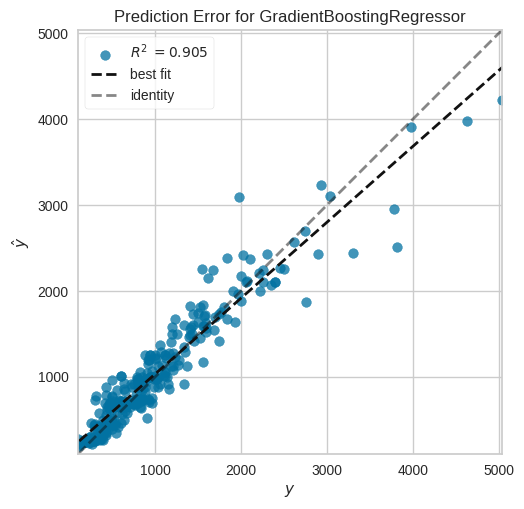

In [ ]:
plot_model(best_model, plot = 'error')


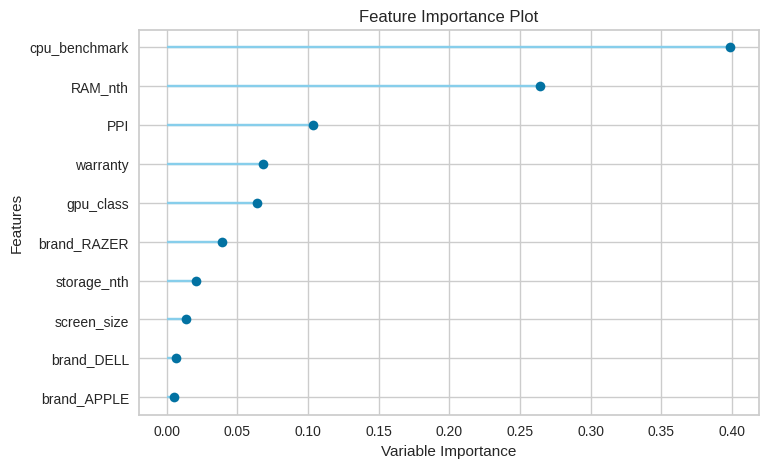

In [ ]:
plot_model(best_model, plot = 'feature')

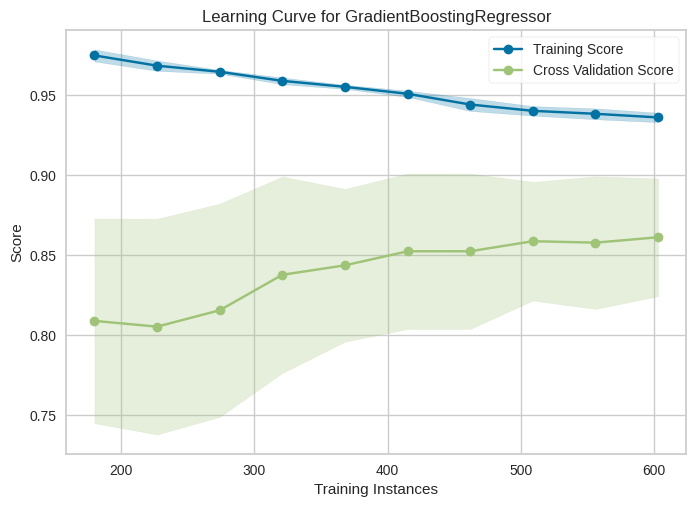

In [ ]:
plot_model(best_model, plot = 'learning')


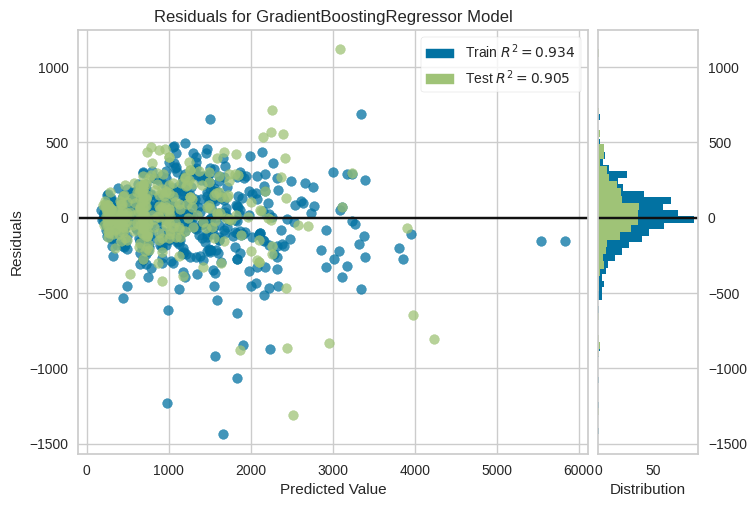

In [ ]:
plot_model(best_model, plot = 'residuals')

# **9. Prediction**

In [ ]:
price_prediction = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,155.1185,54367.9194,233.1693,0.9046,0.2417,0.2015


In [ ]:
price_prediction.head()

,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price,prediction_label
725,DYNABOOK,WINDOWS,3,8.000000,SSD,10076,3,13.3,166,1.0,NO,1030.489990,884.804092
315,ASUS,WINDOWS,3,9.000000,SSD,7607,3,13.3,166,1.0,YES,581.489990,734.512271
856,LENOVO,CHROMEOS,2,6.000000,EMMC,1964,4,11.6,127,1.0,NO,227.490005,265.205246
537,APPLE,MACOS,4,9.965784,SSD,22146,2,16.0,254,1.0,NO,2393.989990,2103.229078
392,ASUS,WINDOWS,3,8.000000,SSD,10076,3,15.6,141,0.0,NO,434.989990,643.456756


# **10. Predict on Unseen data**

In [ ]:
unseen_predictions = predict_model(best_model, data=data_unseen)
unseen_predictions.head(50)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,181.0941,71876.9509,268.0988,0.8979,0.2548,0.2100


,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price,prediction_label
0,ASUS,WINDOWS,4,10.965784,SSD,23322,1,16.000000,142,0.0,YES,2396.489990,1749.396938
1,HP,WINDOWS,3,8.000000,SSD,3256,3,12.500000,176,0.0,YES,253.990005,593.865978
2,MSI,WINDOWS,5,9.965784,SSD,27127,1,15.600000,188,2.0,NO,2299.969971,2259.374862
3,OTHER,WINDOWS,4,9.965784,SSD,21223,1,15.600000,282,2.0,NO,3269.989990,2716.193875
4,LENOVO,WINDOWS,4,8.000000,SSD,16888,3,13.300000,170,3.0,NO,1751.989990,1582.982904
5,CHILLBLAST,WINDOWS,4,10.965784,SSD,27127,1,16.000000,142,3.0,NO,1999.989990,2061.016730
6,CHILLBLAST,WINDOWS,5,10.965784,SSD,27127,1,16.000000,138,3.0,NO,2149.989990,2412.642833
7,CHILLBLAST,WINDOWS,5,10.965784,SSD,27127,1,16.000000,184,3.0,NO,2599.989990,2161.472821
8,AVITA,WINDOWS,3,9.000000,SSD,7276,3,14.000000,157,1.0,NO,566.880005,451.684500
9,RAZER,WINDOWS,4,9.000000,SSD,15381,2,17.299999,127,1.0,NO,2578.100098,1398.584019


# **11. Saving the model**

In [ ]:
save_model(best_model,'laptop_price_model_V1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['RAM_nth', 'storage_nth',
                                              'cpu_benchmark', 'gpu_class',
                                              'screen_size', 'PPI', 'warranty'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['brand', 'operating_system',
                                              'storage_type', 'refurbished'],
                                     transformer=SimpleImput...
 SSD     1
 NaN    -1
 dtype: int64},
                                                                         {'col': 'refurbished',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': NO     0
 YES    1
 NaN   -1
 dtype: 

# **12. Load the saved model (for future use)**

In [ ]:
loaded_laptop_price_model = load_model('laptop_price_model_V1')
loaded_laptop_price_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['RAM_nth', 'storage_nth',
                                             'cpu_benchmark', 'gpu_class',
                                             'screen_size', 'PPI', 'warranty'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['brand', 'operating_system',
                                             'storage_type', 'refurbished'],
                                    transformer=SimpleImput...
SSD     1
NaN    -1
dtype: int64},
                                                                        {'col': 'refurbished',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': NO     0
YES    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['brand', 'operating_system'],
                                    transformer=OneHotEncoder(cols=['brand',
                                                                    'operating_system'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', GradientBoostingRegressor(random_state=333))])